# 0. Setup Paths

In [169]:
import os

In [170]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [171]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [172]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [174]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [175]:
files

{'PIPELINE_CONFIG': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config',
 'TF_RECORD_SCRIPT': 'Tensorflow\\scripts\\generate_tfrecord.py',
 'LABELMAP': 'Tensorflow\\workspace\\annotations\\label_map.pbtxt'}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [176]:
if os.name=='nt':
    !pip install wget
    import wget

In [177]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [178]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detecti

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
error: numpy 1.22.2 is installed but numpy<1.22.0,>=1.14.3 is required by {'apache-beam'}



byte-compiling build\bdist.win-amd64\egg\nets\lenet.py to lenet.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\nets\mobilenet\conv_blocks.py to conv_blocks.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\nets\mobilenet\mobilenet.py to mobilenet.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\nets\mobilenet\mobilenet_v2.py to mobilenet_v2.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\nets\mobilenet\mobilenet_v2_test.py to mobilenet_v2_test.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\nets\mobilenet\mobilenet_v3.py to mobilenet_v3.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\nets\mobilenet\mobilenet_v3_test.py to mobilenet_v3_test.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\nets\mobilenet\__init__.py to __init__.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\nets\mobilenet_v1.py to mobilenet_v1.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\nets\mobilenet_v1_eval.py to mobilenet_v1_eval.cpython-39.pyc

Obtaining file:///C:/Users/DeAndra%20Peoples/TFODCourse/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [179]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.7: C:\Users\DeAndra Peoples\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-04-17 12:19:16.140484: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-17 12:19:16.603391: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3906 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5
C:\Users\DeAndra Peoples\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\builders\model_builder.py:1100: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Build

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
#!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2.2

In [ ]:
!pip install Pillow

In [ ]:
!pip install pyyaml

In [180]:
import object_detection

In [15]:
!pip list

Package                       Version             Editable project location
----------------------------- ------------------- -------------------------------------------------------------------
absl-py                       1.0.0
aiohttp                       3.8.1
aiosignal                     1.2.0
apache-beam                   2.37.0
argcomplete                   2.0.0
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         21.4.0
avro-python3                  1.10.2
backcall                      0.2.0
black                         22.1.0
boto                          2.49.0
cachetools                    5.0.0
certifi                       2021.10.8
cffi                          1.15.0
charset-normalizer            2.0.12
click                         8.0.4
colorama                      0.4.4
contextlib2                   21.6.0
crcmod                        1.7
cryptography                  36.0.2
cyc

In [182]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [183]:
labels = [{'name':'person', 'id':1}, {'name':'pencil', 'id':2}, {'name':'sodacan', 'id':3}]#, {'name':'sodacan', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
#ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [185]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [ ]:
!pip install pytz

In [186]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [187]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [23]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format
import cv2

In [193]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [194]:
config

{'model': ssd {
   num_classes: 3
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [189]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [190]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 3
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [191]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [195]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
#!pip uninstall pycocotools
!pip install pycocotools

In [196]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [163]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=3000


In [ ]:
!{command}

# 7. Evaluate the Model

In [197]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [198]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [68]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [199]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [56]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [164]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [201]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', r'C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\pencil.effbf823-be72-11ec-97ce-4074e0b1e652.jpg')

In [202]:
IMAGE_PATH

'C:\\Users\\DeAndra Peoples\\TFODCourse\\Tensorflow\\workspace\\images\\test\\pencil.effbf823-be72-11ec-97ce-4074e0b1e652.jpg'

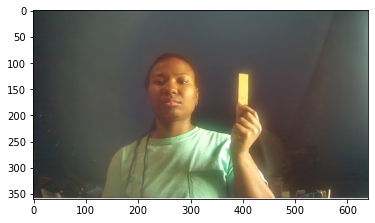

In [210]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [233]:
import sys
import time
import os
# [START storage_file_upload_from_memory]
from google.cloud import storage
from google.oauth2 import service_account
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
from PIL import Image

In [234]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"C:\Users\DeAndra Peoples\TFODCourse\capstoneprog-b5657215b26d.json"
#client = storage.Client.from_service_account_json(r"C:\Users\DeAndra Peoples\TFODCourse\capstoneprog_access_file.json")
#credentials = service_account.Credentials.from_service_account_file('C:/Users/DeAndra Peoples/TFODCourse/Tensorflow/workspace/images/collectedimages/capstoneprog_access_file.json',
                                                                   # scopes=['email'],
                                                                   # subject='deandrapeoples@gmail.com')
"C:/Users/DeAndra Peoples/TFODCourse/Tensorflow/workspace/images/collectedimages/capstoneprog_access_file.json"
client = storage.Client()
BUCKETS = list(client.list_buckets())


KeyboardInterrupt: 

In [276]:
def download_blobs(bucket_name, x):
    """Lists all the blobs in the bucket."""
    # bucket_name = "your-bucket-name"

    storage_client = storage.Client()

    # Note: Client.list_blobs requires at least package version 1.17.0.
    blobs = storage_client.list_blobs('capstone2022',prefix='test')

    for blob in blobs:
        x = x+1
        if x == 1:
            continue
        else:
        #blob = bucket.blob(blob.name)
            blob.download_to_filename(r'C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images'+'/'+ blob.name)
            #print(blob.name + ' Successfully downloaded.')
            blob = blob.name
            #print(blob)

    return blob

def upload_blob(bucket_name, source_file, blob_name):

    client = storage.Client()
    bucket = client.bucket(bucket_name)
    blob = bucket.blob(blob_name)
    
    blob.upload_from_filename(source_file)
    
    print("File {} uploaded to {}.".format(source_file, blob_name))
    
def get_frames(inputFile,outputFolder,step,count):

  #initializing local variables
    step = step
    frames_count = count

    currentframe = 0
    frames_captured = 0

  #creating a folder
    try:  
        # creating a folder named data 
        if not os.path.exists(outputFolder): 
            os.makedirs(outputFolder) 
    
  #if not created then raise error 
    except OSError: 
        print('Error! Could not create a directory') 
  
  #reading the video from specified path 
    cam = cv2.VideoCapture(r"C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\pencilvid1.mkv") 

  #reading the number of frames at that particular second
    frame_per_second = cam.get(cv2.CAP_PROP_FPS)

    while (True):
        ret, frame = cam.read()
        if ret:
            if currentframe > (step*frame_per_second):  
                currentframe = 0
              #saving the frames (screenshots)
                name = '/frame' + str(frames_captured) + '.jpg'
                print('Creating...' + name) 
                store = outputFolder + name
                cv2.imwrite(store, frame)
                cv2.imshow('frame', frame)
                frames_captured+=1
              
              #breaking the loop when count achieved
                if frames_captured > frames_count-1:
                    ret = False
                currentframe += 1           
            if ret == False:
                break

In [277]:
inputf = r"C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\pencilvid1.mkv"
get_frames(inputf,r'C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test',.03,10)

KeyboardInterrupt: 

C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame0.jpg


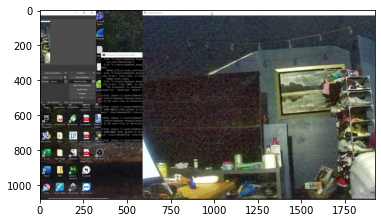

1
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame1.jpg


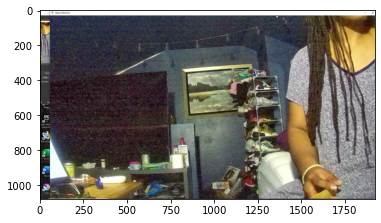

2
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame2.jpg


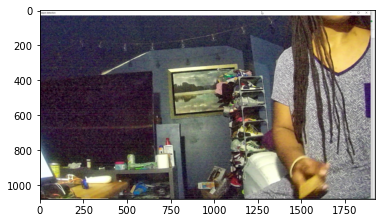

3
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame3.jpg


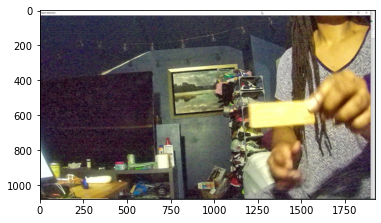

4
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame4.jpg


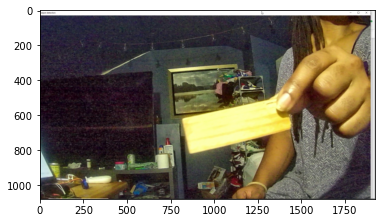

5
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame5.jpg


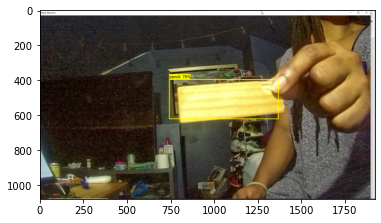

6
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame6.jpg


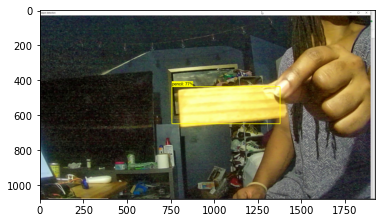

7
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame7.jpg


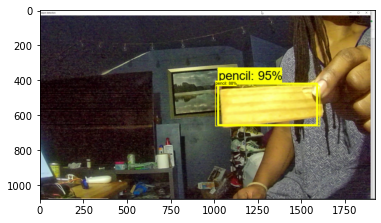

8
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame8.jpg


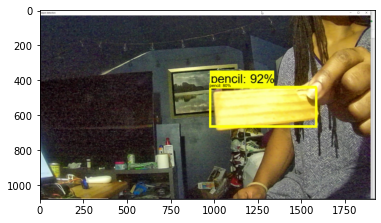

9
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame9.jpg


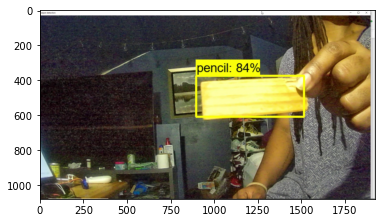

10
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame10.jpg


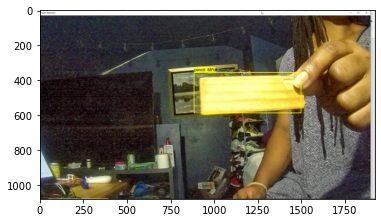

11
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame11.jpg


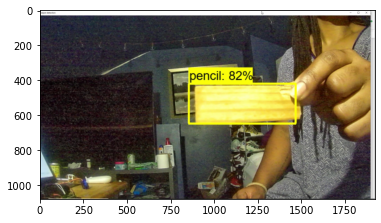

12
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame12.jpg


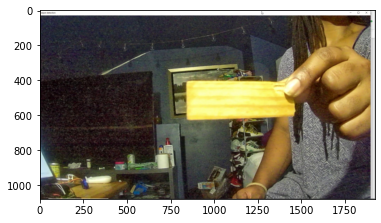

13
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame13.jpg


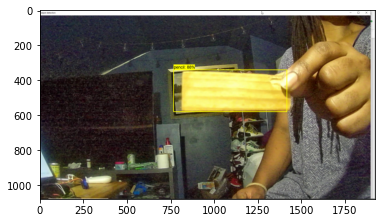

14
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame14.jpg


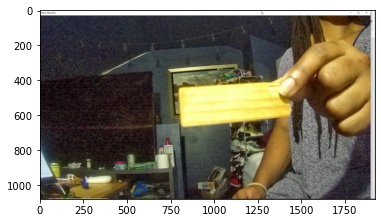

15
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame15.jpg


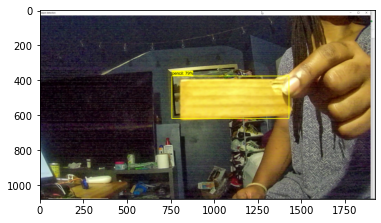

16
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame16.jpg


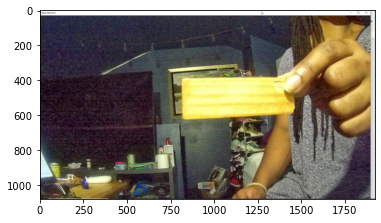

17
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame17.jpg


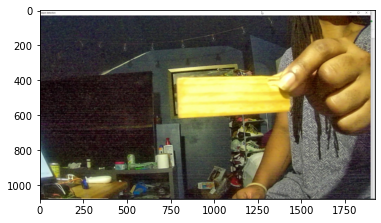

18
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame18.jpg


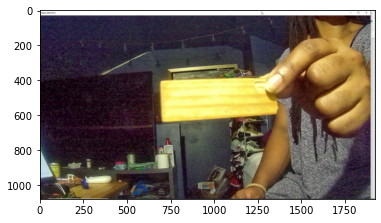

19
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame19.jpg


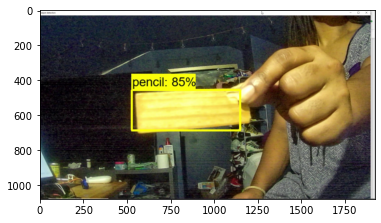

20
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame20.jpg


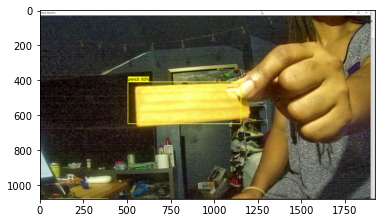

21
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame21.jpg


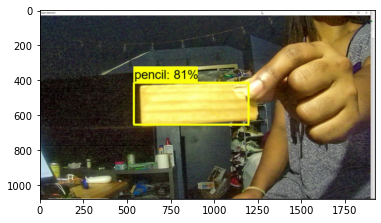

22
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame22.jpg


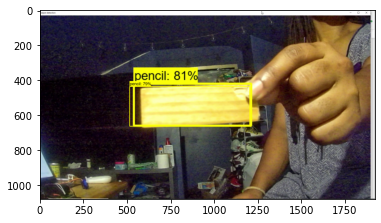

23
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame23.jpg


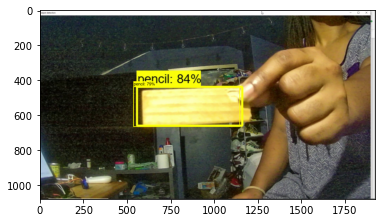

24
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame24.jpg


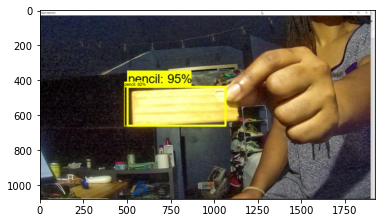

25
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame25.jpg


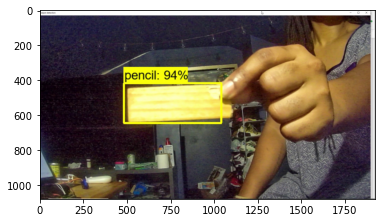

26
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame26.jpg


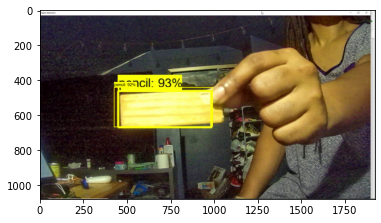

27
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame27.jpg


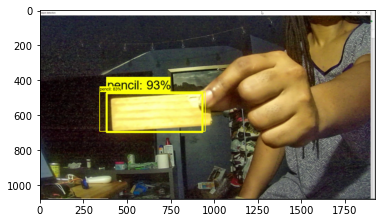

28
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame28.jpg


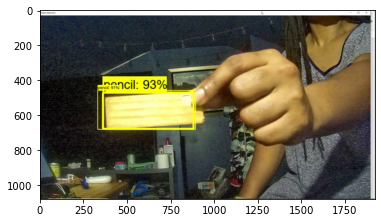

29
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame29.jpg


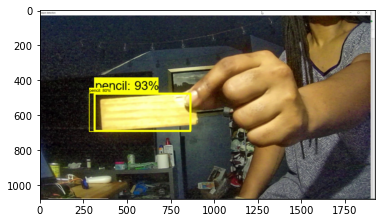

30
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame30.jpg


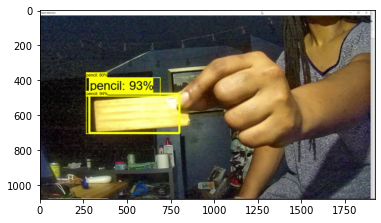

31
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame31.jpg


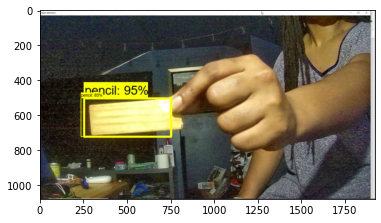

32
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame32.jpg


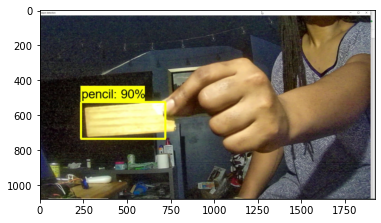

33
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame33.jpg


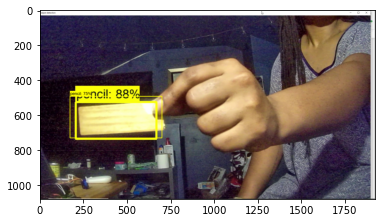

34
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame34.jpg


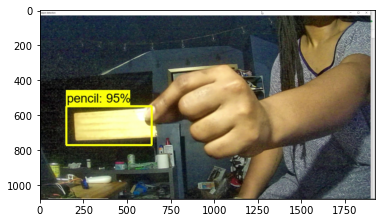

35
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame35.jpg


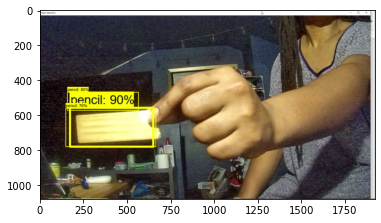

36
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame36.jpg


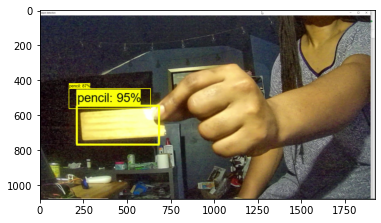

37
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame37.jpg


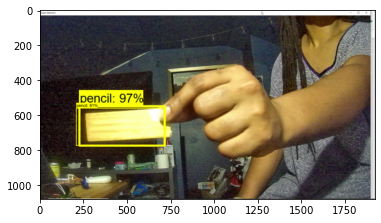

38
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame38.jpg


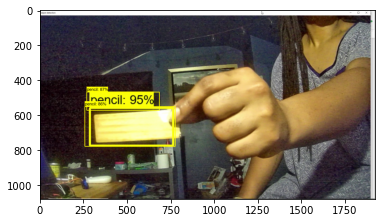

39
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame39.jpg


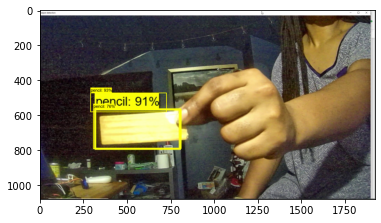

40
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame40.jpg


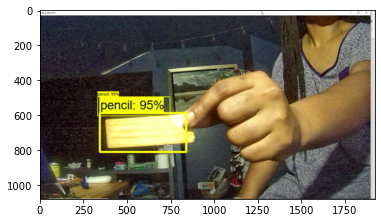

41
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame41.jpg


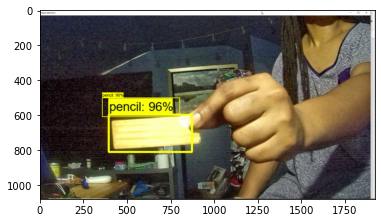

42
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame42.jpg


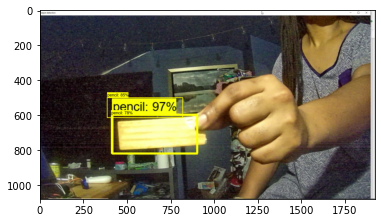

43
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame43.jpg


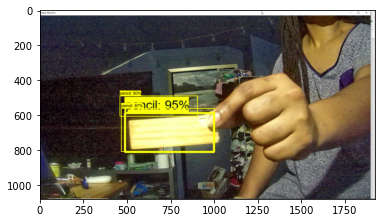

44
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame44.jpg


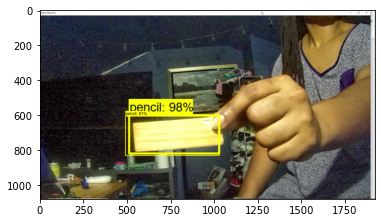

45
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame45.jpg


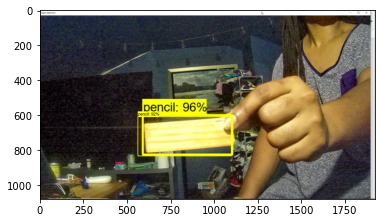

46
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame46.jpg


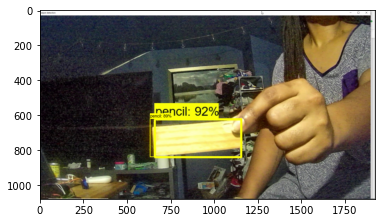

47
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame47.jpg


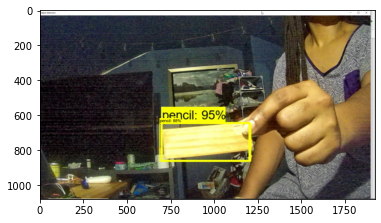

48
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame48.jpg


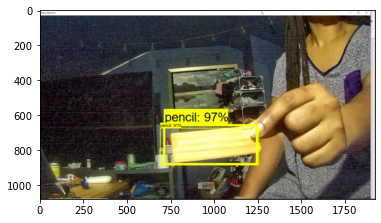

49
C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame49.jpg


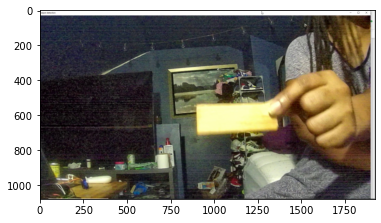

50


In [301]:
import glob

count = 0

while (count < 50):
    #cv2.imwrite(r"C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame%d.jpg" % count, image)     # save frame as JPEG file      
    IMAGE_PATH = r"C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\frame%d.jpg" % count
    print(IMAGE_PATH)
    img = cv2.imread(IMAGE_PATH)
    image_np = np.array(img)
    #print(image_np)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

# detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.75,
            agnostic_mode=False)

    img2 = cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB)
    plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.imsave(r"C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\collectedimages\servervid%d.jpg" % count, img2)
    plt.show()
    count = count + 1
    frame = r"C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\collectedimages\servervid%d.jpg" % count
    print(count)
    #frame = cv2.flip(frame,0)
    #cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    #else:
        #break
        
img_array = []
for filename in glob.glob(r"C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\collectedimages\servervid*.jpg"):
    img3 = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img3)
        
out = cv2.VideoWriter(r'C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
                          
for i in range(len(img_array)):
    out.write(img_array[i])
    
out.release()
cap.release()

out.release()

cv2.destroyAllWindows()

In [232]:
blob = download_blobs('capstone2022', 0)
#print(blob)

KeyboardInterrupt: 

In [265]:
#get_frames(r'C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test\video.avi',r'C:\Users\DeAndra Peoples\TFODCourse\Tensorflow\workspace\images\test',.03,10)
cap = cv2.VideoCapture(1)
img = cv2.imread(IMAGE_PATH)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print()

while cap.isOpened():
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.5,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (1920, 1080)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

ValueError: in user code:

    File "C:\Users\DeAndra Peoples\AppData\Local\Temp\ipykernel_31476\3019062303.py", line 11, in detect_fn  *
        image, shapes = detection_model.preprocess(image)
    File "C:\Users\DeAndra Peoples\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\meta_architectures\ssd_meta_arch.py", line 484, in preprocess  *
        normalized_inputs, self._image_resizer_fn)
    File "C:\Users\DeAndra Peoples\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\utils\shape_utils.py", line 492, in resize_images_and_return_shapes  *
        outputs = static_or_dynamic_map_fn(
    File "C:\Users\DeAndra Peoples\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\utils\shape_utils.py", line 246, in static_or_dynamic_map_fn  *
        outputs = [fn(arg) for arg in tf.unstack(elems)]
    File "C:\Users\DeAndra Peoples\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\core\preprocessor.py", line 3327, in resize_image  *
        new_image = tf.image.resize_images(

    ValueError: 'images' must have either 3 or 4 dimensions.


# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')